## Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    CRIM    506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.603721,68.242007,3.790190,10.691700,407.154545,19.952767,355.158676,12.676719,22.545850
std,8.601545,23.322453,6.860353,0.253994,0.115878,5.257644,28.405301,2.107093,19.791583,170.151343,23.866625,93.768532,7.161000,9.182691
min,0.006320,0.000000,0.460000,0.000000,0.385000,0.569000,2.505000,1.000000,1.000000,15.200000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,43.875000,2.091150,4.000000,279.000000,17.400000,374.835000,6.950000,17.100000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,76.950000,3.207450,5.000000,330.000000,19.100000,391.340000,11.395000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.630000,93.975000,5.118000,24.000000,666.000000,20.200000,396.192500,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,96.100000,100.000000,12.126500,311.000000,711.000000,396.900000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# housing.hist(bins=50, figsize=(20,15))
# plt.show()

## Train-Test Splitting

In [10]:
# for learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Testing Rows : {len(test_set)}\nTraining Rows : {len(train_set)}\n")

Testing Rows : 102
Training Rows : 404



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_test = housing.loc[test_index]
    strat_train = housing.loc[train_index]

In [14]:
strat_test['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
strat_train['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
housing = strat_train.copy()

## Looking for Correlation

In [17]:
matrix_corr = housing.corr()
matrix_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
B          0.356023
ZN         0.339752
DIS        0.239482
CHAS       0.205452
RM         0.109142
PTRATIO   -0.054734
RAD       -0.187883
AGE       -0.364109
 CRIM     -0.393324
NOX       -0.422652
TAX       -0.453224
INDUS     -0.473056
LSTAT     -0.738862
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

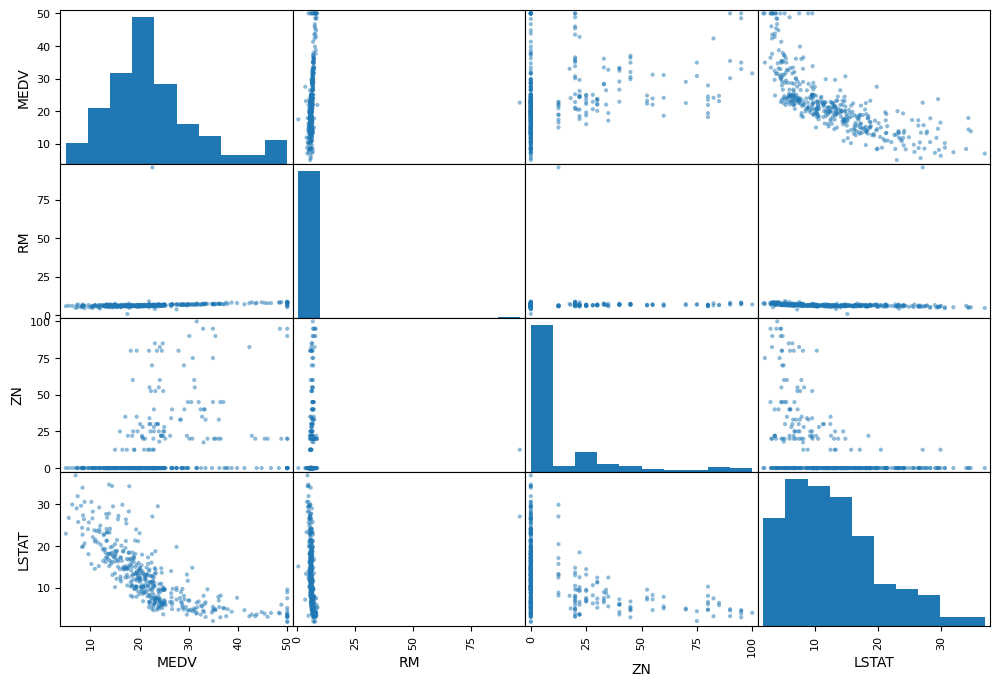

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='MEDV', ylabel='RM'>

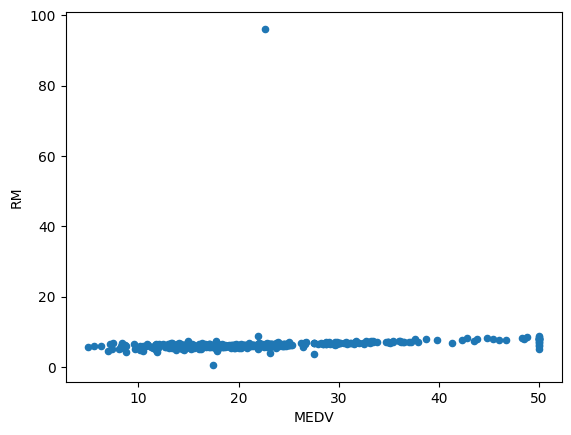

In [19]:
housing.plot(kind="scatter", x='MEDV', y='RM')

## Trying out Attribute Combinations

In [20]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
B          0.356023
ZN         0.339752
DIS        0.239482
CHAS       0.205452
RM         0.109142
PTRATIO   -0.054734
RAD       -0.187883
AGE       -0.364109
TAXRM     -0.390882
 CRIM     -0.393324
NOX       -0.422652
TAX       -0.453224
INDUS     -0.473056
LSTAT     -0.738862
Name: MEDV, dtype: float64

<Axes: xlabel='MEDV', ylabel='TAXRM'>

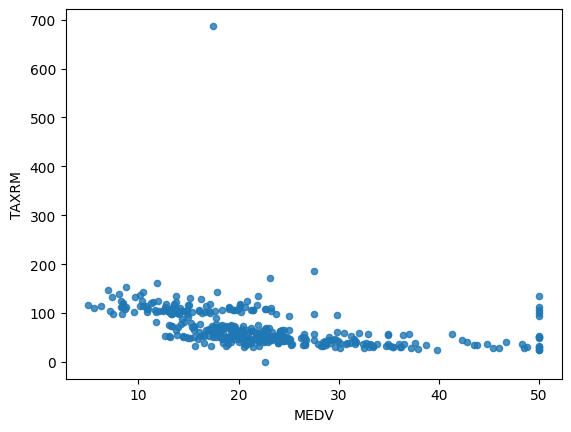

In [22]:
housing.plot(kind="scatter", x="MEDV", y="TAXRM", alpha=0.8)

In [23]:
housing = strat_train.drop("MEDV", axis=1)
housing_labels = strat_train["MEDV"].copy()

## Missing Attributes

In [24]:
a = housing.dropna(subset=["RM"]).shape
a

(401, 13)

In [25]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.491337,68.816709,3.743857,10.492574,411.609406,19.418069,352.457797,12.811287
std,8.099383,22.150636,6.877817,0.254290,0.116875,4.551512,28.399618,2.097112,17.344057,169.752174,18.946347,97.472771,7.263831
min,0.006320,0.000000,0.740000,0.000000,0.389000,0.569000,2.900000,1.129600,1.000000,15.200000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.225000,2.035975,4.000000,284.000000,17.400000,374.237500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,77.950000,3.122200,5.000000,337.000000,19.050000,390.945000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.635000,94.025000,5.035675,24.000000,666.000000,20.200000,395.622500,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,96.100000,100.000000,12.126500,311.000000,711.000000,396.900000,396.900000,36.980000


In [26]:
housing.drop("RM", axis=1).shape

(404, 12)

In [27]:
median = housing["RM"].median()
housing["RM"].fillna(median)
housing.shape

(404, 13)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.79500e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90500e+01, 3.90945e+02, 1.15700e+01])

In [30]:
X = imputer.transform(housing)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [32]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.489255,68.816709,3.743857,10.492574,411.609406,19.418069,352.457797,12.811287
std,8.099383,22.150636,6.877817,0.254290,0.116875,4.534603,28.399618,2.097112,17.344057,169.752174,18.946347,97.472771,7.263831
min,0.006320,0.000000,0.740000,0.000000,0.389000,0.569000,2.900000,1.129600,1.000000,15.200000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.225000,2.035975,4.000000,284.000000,17.400000,374.237500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,77.950000,3.122200,5.000000,337.000000,19.050000,390.945000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.025000,5.035675,24.000000,666.000000,20.200000,395.622500,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,96.100000,100.000000,12.126500,311.000000,711.000000,396.900000,396.900000,36.980000


## Creating a Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [35]:
housing_num_tr.shape

(404, 13)

## Selecting Desired Model 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# model = LinearRegression()
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [37]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([22.35 , 25.495, 16.446, 23.311, 23.617])

In [39]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [40]:
from sklearn.metrics import mean_squared_error
house_predict = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, house_predict)
rmse = np.sqrt(mse)
rmse

np.float64(1.1973983007312377)

## Using better evaluation techinique - Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [42]:
rmse_scores

array([2.85666321, 2.78949324, 4.24827085, 2.61922152, 3.63696787,
       2.54906828, 4.45793506, 2.89435948, 3.02570387, 3.21104266])

In [43]:
 def print_scores(scores):
     print("Scores: ", scores)
     print("Mean: ", scores.mean())
     print("Standard Deviation: ", scores.std())

In [44]:
print_scores(rmse_scores)

Scores:  [2.85666321 2.78949324 4.24827085 2.61922152 3.63696787 2.54906828
 4.45793506 2.89435948 3.02570387 3.21104266]
Mean:  3.228872604842356
Standard Deviation:  0.6352327070171908


## Saving the model

In [45]:
from joblib import dump, load
dump(model,"Price_Predictor.joblib")

['Price_Predictor.joblib']

## Testing the model on test data

In [51]:
x_test = strat_test.drop('MEDV', axis = 1)
y_test = strat_test['MEDV'].copy()
x_test_prepared = my_pipeline.transform(x_test)
predicted = model.predict(x_test_prepared)
mse = mean_squared_error(y_test, predicted)

In [52]:
rmse = np.sqrt(mse)

In [53]:
rmse

np.float64(2.838182461765717)

In [55]:
x_test_prepared[0]

array([-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        0.0112045 , -0.32141324,  1.20459526, -0.54798852,  0.06128627,
       -0.18591613,  0.38522248, -0.57358809])